# **Deep Neural Network**

In [ ]:
# Selecting the required Keras and TensorFlow version
!pip install q keras==2.3.1
%tensorflow_version 1.5.1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.5.1`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
# Importing relevant packages
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Size of MNIST training set = %d." % len(X_train))
print("Size of MNIST test set = %d" % len(X_test))

Size of MNIST training set = 60000.
Size of MNIST test set = 10000


In [ ]:
# Scaling each pixel to the range [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
# Encoding the labels into integers
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# Defining the Model Architecture
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_______________________________________

In [ ]:
# Compiling the Model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# Training the Model
history = model.fit(X_train, y_train, batch_size=128, epochs=7, validation_data=(X_test, y_test), verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 4s 61us/step - loss: 0.3091 - accuracy: 0.9057 - val_loss: 0.1088 - val_accuracy: 0.9663
Epoch 2/7
60000/60000 [==============================] - 2s 35us/step - loss: 0.1281 - accuracy: 0.9636 - val_loss: 0.0962 - val_accuracy: 0.9723
Epoch 3/7
60000/60000 [==============================] - 2s 34us/step - loss: 0.0972 - accuracy: 0.9737 - val_loss: 0.0939 - val_accuracy: 0.9727
Epoch 4/7
60000/60000 [==============================] - 2s 35us/step - loss: 0.0824 - accuracy: 0.9779 - val_loss: 0.0870 - val_accuracy: 0.9756
Epoch 5/7
60000/60000 [==============================] - 2s 34us/step - loss: 0.0725 - accuracy: 0.9800 - val_loss: 0.0859 - val_accuracy: 0.9777
Epoch 6/7
60000/60000 [==============================] - 2s 37us/step - loss: 0.0638 - accuracy: 0.9830 - val_loss: 0.0914 - val_accuracy: 0.9781
Epoch 7/7
60000/60000 [==============================] - 2s 36us/step - l

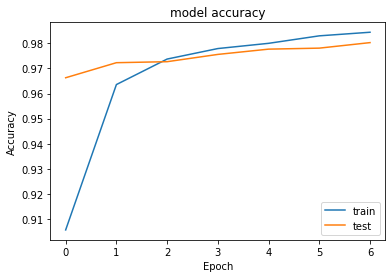

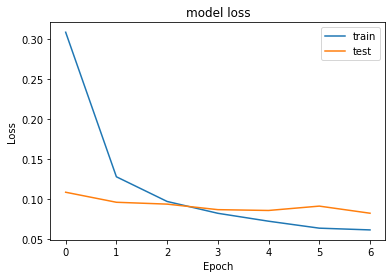

In [ ]:
# summarizing the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarizing the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# Computing the classification perfomance on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

Test loss: 0.08248815764587998
Test accuracy: 98.03000092506409


In [ ]:
# Saving the trained model
model.save('deep_model.h5')